In [85]:
import os,sys,inspect
currentdir = "D:/GPN_KIP-master/big_cluster"
# parentdir = os.path.dirname(currentdir)
parentdir = "D:/GPN_KIP-master"
sys.path.insert(0,parentdir)

In [86]:
import pandas as pd
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import time

import json

import traceback


import random
import pathlib
from turtle import color

C:\Users\AB\AppData\Local\Temp\ipykernel_10640\2674488889.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_loc = df[df['file'].str.contains(option)][df['file'].str.contains(r'^(?:(?!1500).)*$')][df['file'].str.contains('coded')][df['file'].str.contains(r'^(?:(?!uncoded).)*$')][df['file'].str.contains('MI')]
d:\GPN_KIP-master\venv\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\GPN_KIP-master\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


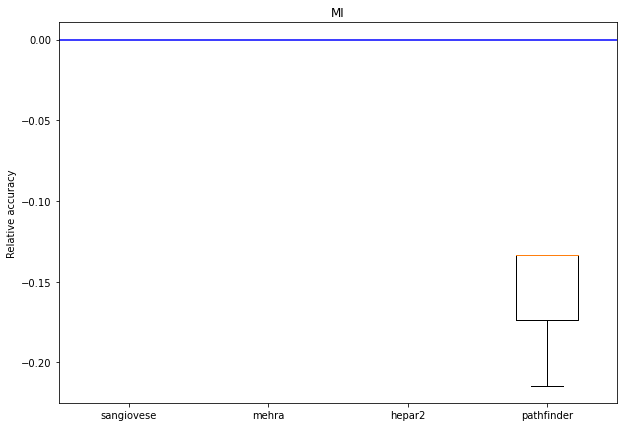

In [139]:
from tkinter.ttk import Style

data_dict = {name: [] for name in ['sangiovese', 'mehra', 'hepar2', 'pathfinder']}
mean_dict = {name: 0.0 for name in ['sangiovese', 'mehra', 'hepar2', 'pathfinder']}
for name in data_dict.keys():
    df = pd.read_csv(f'{currentdir}/{name}_acc.csv')
    # df_loc = df[df['file'].str.contains(r'^(?:(?!1500).)*$')][df['file'].str.contains('coded')][df['file'].str.contains(r'^(?:(?!uncoded).)*$')][df['file'].str.contains(r'^(?:(?!MI).)*$')]
    df_loc = df[df['file'].str.contains(r'^(?:(?!1500).)*$')][df['file'].str.contains('coded')][df['file'].str.contains(r'^(?:(?!uncoded).)*$')][df['file'].str.contains('MI')]
    df_coded = df_loc[df_loc['file'].str.contains(r'^(?:(?!_simple).)*$')]
    df_simple = df_loc[df_loc['file'].str.contains('_simple')]
    df_coded.reset_index(inplace=True, drop=True)
    df_simple.reset_index(inplace=True, drop=True)
    res_dict = {node: [] for node in df_coded.columns if node != 'file'}
    for key in res_dict.keys():
        res_dict[key] = df_coded[key]/df_simple[key] -1.0
    data = []
    for key in res_dict.keys():
        res_dict[key] = [val for val in res_dict[key] if val !=0.0]
        data.extend(res_dict[key])
    data_dict[name] = data
    mean_dict[name] = np.mean(data)
fig, ax = plt.subplots(figsize =(10, 7))
# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_dict.values())
# for i, name in enumerate(list(data_dict.keys())):
#         ax.scatter([i for _ in range(len(data_dict[name]))], data_dict[name], color='k', alpha=0.25)
# ax.plot([i for i in range(len(data_dict.keys()))], [mean_dict[name] for name in data_dict.keys()], color = 'b')
ax.set_xticklabels(data_dict.keys())
ax.set_ylabel('Relative accuracy')
ax.hlines(xmin =0.5, xmax=4.5, y =0, color='b')
# ax.set_title('BIC')
ax.set_title('MI')
# plt.show()
# plt.savefig(f'BIC_acc.pdf')
plt.savefig(f'MI_acc.pdf')